In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
feature_names = df.columns
for i in range(len(feature_names)):
    print(str(i), "\t", str(feature_names[i]),"\t\t\t", str(type(df.iloc[0,i])))

0 	 Date 			 <class 'str'>
1 	 Location 			 <class 'str'>
2 	 MinTemp 			 <class 'numpy.float64'>
3 	 MaxTemp 			 <class 'numpy.float64'>
4 	 Rainfall 			 <class 'numpy.float64'>
5 	 Evaporation 			 <class 'numpy.float64'>
6 	 Sunshine 			 <class 'numpy.float64'>
7 	 WindGustDir 			 <class 'str'>
8 	 WindGustSpeed 			 <class 'numpy.float64'>
9 	 WindDir9am 			 <class 'str'>
10 	 WindDir3pm 			 <class 'str'>
11 	 WindSpeed9am 			 <class 'numpy.float64'>
12 	 WindSpeed3pm 			 <class 'numpy.float64'>
13 	 Humidity9am 			 <class 'numpy.float64'>
14 	 Humidity3pm 			 <class 'numpy.float64'>
15 	 Pressure9am 			 <class 'numpy.float64'>
16 	 Pressure3pm 			 <class 'numpy.float64'>
17 	 Cloud9am 			 <class 'numpy.float64'>
18 	 Cloud3pm 			 <class 'numpy.float64'>
19 	 Temp9am 			 <class 'numpy.float64'>
20 	 Temp3pm 			 <class 'numpy.float64'>
21 	 RainToday 			 <class 'str'>
22 	 RainTomorrow 			 <class 'str'>


# Dummy Data Gen

In [2]:
def gen_cluster(n, max_mean=10, max_var=3):
    means = np.random.rand(2) * max_mean
    var = np.random.rand(2) * max_var
    x = np.random.normal(means[0], var[0], n).reshape(n,1)
    y = np.random.normal(means[1], var[1], n).reshape(n,1)
    data = np.concatenate([x, y], axis=1)
    return data

def gen_data(num_clusts=3, n=100):
    pos_data = gen_cluster(n, max_mean=10, max_var=5)
    neg_data = gen_cluster(n, max_mean=10, max_var=5)
    for i in range(num_clusts-1):
        pos_data = np.concatenate([pos_data, gen_cluster(n, max_mean=10, max_var=5)])
        neg_data = np.concatenate([neg_data, gen_cluster(n, max_mean=10, max_var=5)])
    data = np.concatenate([pos_data, neg_data])
    labels = [1] * (n * num_clusts) + [0] * (n * num_clusts)
    return data, labels

(600, 2)


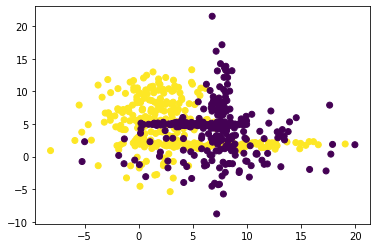

In [3]:
data, labels = gen_data(num_clusts=3, n=100)
print(data.shape)
plt.scatter(data[:,0], data[:,1], c=labels)

In [4]:
# ideas: just do kmeans first and use that straight as labels, make it optimize with other class decreasing affinity, 
# pick out of many iters that which doens't have other class with high affinity
# optimize with two sets of clusters at once, each trying to only have those from their stuff
# penalty to including points of other cluster but still trying to optimize normally

In [5]:
import gmm
%aimport gmm

In [9]:
alg = gmm.GMM(n_components=4, init='random')

In [17]:
alg.fit(data)

likelihood -3364.9022684832416


C:\Users\Alex\Desktop\academics\orie-4741\ORIE-4741-Project\gmm.py:160: RuntimeWarning: invalid value encountered in double_scalars
  if theta is None:


likelihood -3350.2283002948316
likelihood -3344.322576982382
likelihood -3340.5197277719435
likelihood -3337.418634210144
likelihood -3334.578819745433
likelihood -3331.9283725152595
likelihood -3329.6147321253748
likelihood -3327.782784388065
likelihood -3326.4279543248435
likelihood -3325.465598801084
likelihood -3324.792929512597
likelihood -3324.3149228653583
likelihood -3323.9581420168324
likelihood -3323.6730448302437


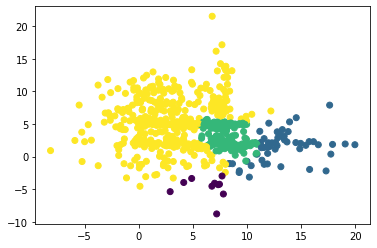

-3323.6730448302437

In [18]:
alg.plot2d(data)
alg.gmm_likelihood(data)